<a href="https://colab.research.google.com/github/mohitsharmas97/ML_notebooks/blob/main/Lasso_and_Ridge_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
dataset=pd.read_csv("Housing (1).csv")
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [ ]:
dataset.drop("furnishingstatus", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
# Select categorical columns for one-hot encoding
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the selected columns
encoded_data = encoder.fit_transform(dataset[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and concatenate the encoded DataFrame
dataset = dataset.drop(categorical_cols, axis=1)
dataset = pd.concat([dataset, encoded_df], axis=1)

# Display the head of the modified dataset
display(dataset.head())

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0


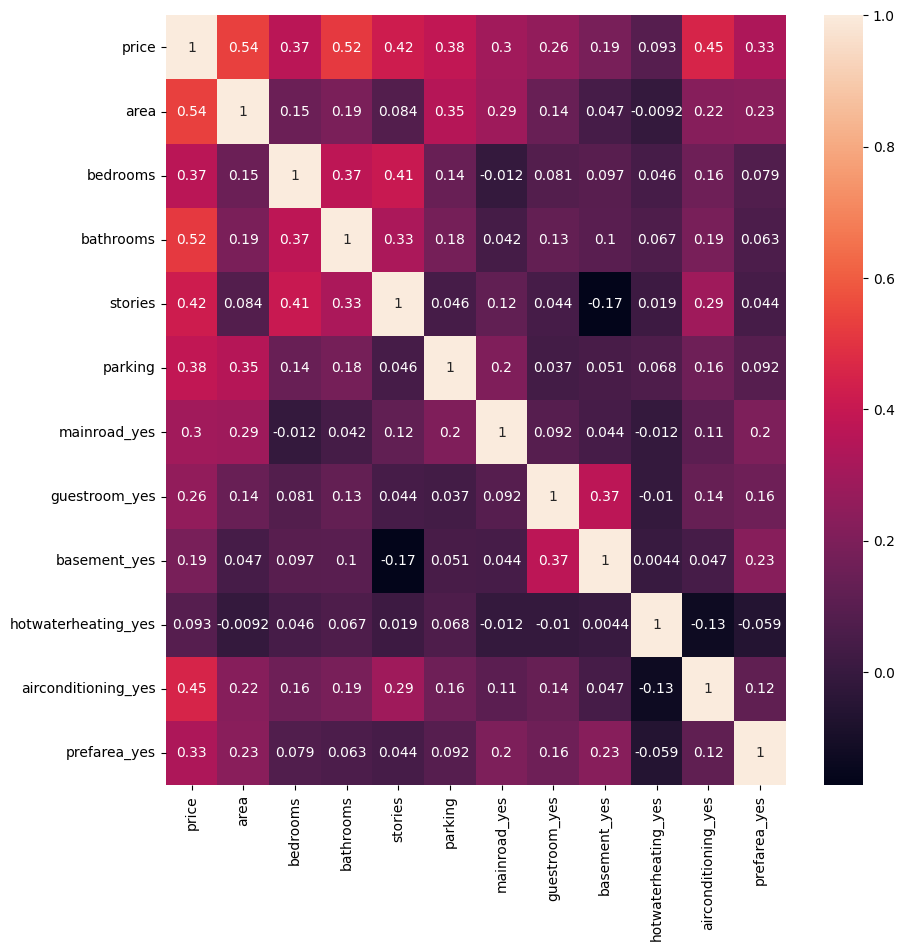

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [ ]:
x=dataset.drop("price",axis=1)
y=dataset["price"]

In [ ]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge


In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_test,y_test)

0.6437296086614108

In [ ]:
lr.coef_

array([515391.84048078,  57872.77643642, 556891.06724164, 370000.89986419,
       212997.79914707, 143741.72357995,  93178.80728202, 207547.04663859,
       149010.39505059, 375713.43953875, 269942.44162469])

In [ ]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

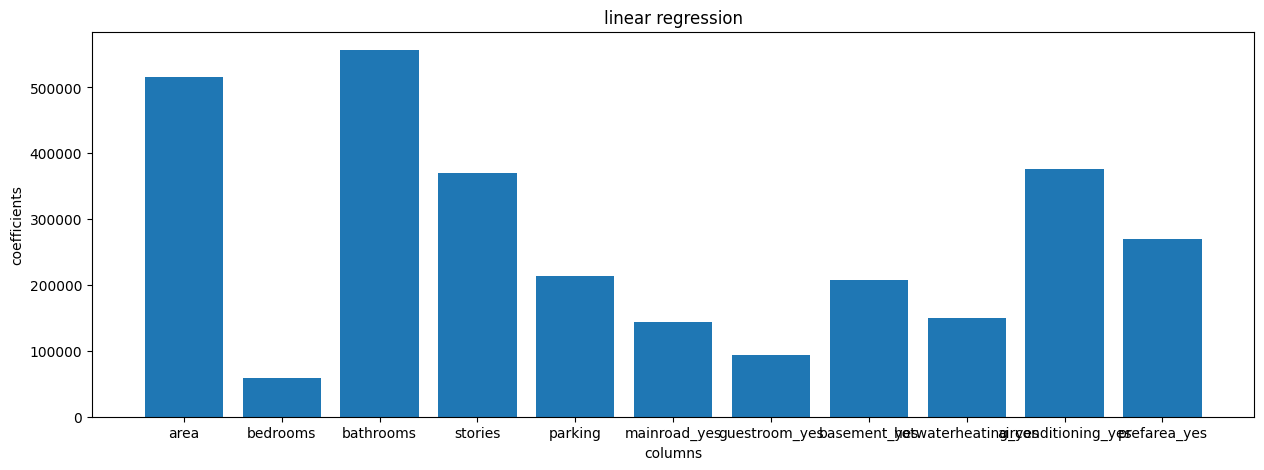

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("linear regression")
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [ ]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

1800793719718.9717
979112.2162187384
1341936.5557726533


979112.2162187384

###lasso (l1)


```
# This is formatted as code
```



In [ ]:
la=Lasso(alpha=100)
la.fit(x_train,y_train)
la.score(x_test,y_test)

0.6436957952101392

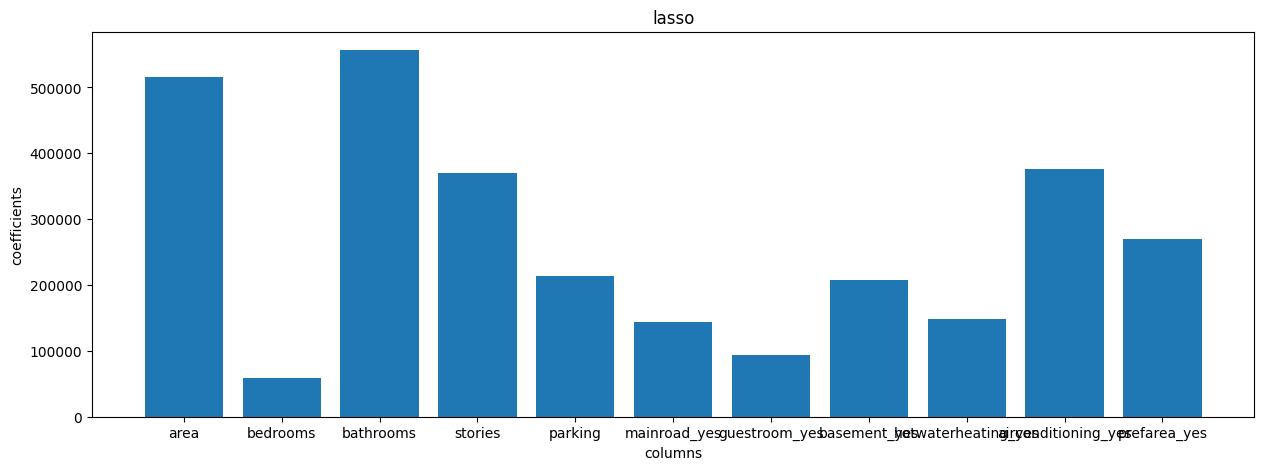

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("lasso")
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.show()

In [ ]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

1800964632183.6956
979160.6741185838
1342000.235537869


##ridge

In [ ]:
ri=Ridge(alpha=100)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)

0.6247195805652813

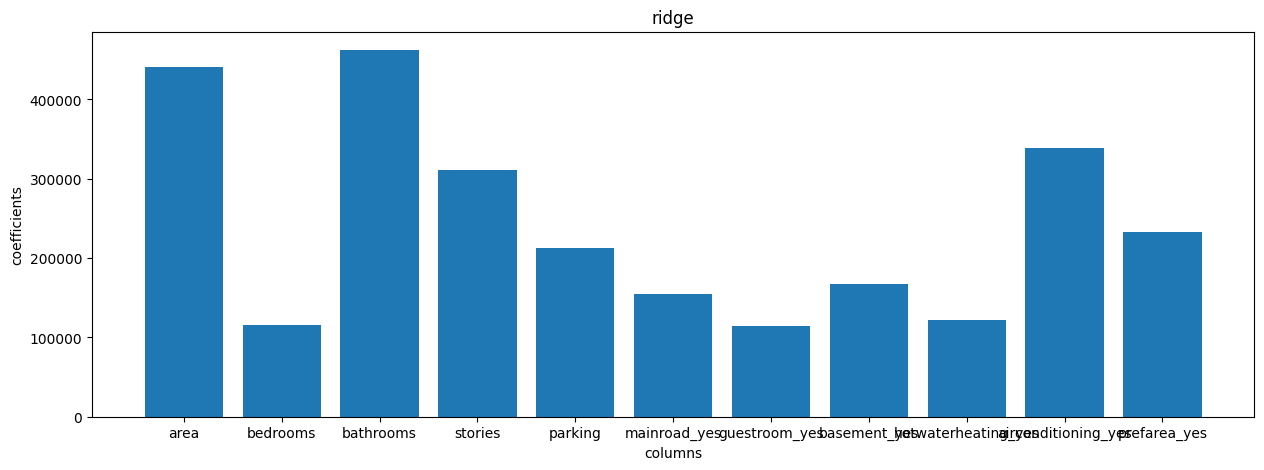

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("ridge")
plt.xlabel("columns")
plt.ylabel("coefficients")
plt.show()

In [ ]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

1896881242116.1301
991348.8640873526
1377273.1181999198


In [ ]:
df=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [ ]:
df


,col_name,LinearRegression,Lasso,Ridge
0,area,515391.840481,515368.974310,440558.374887
1,bedrooms,57872.776436,57849.003507,114928.383919
2,bathrooms,556891.067242,556852.260387,462257.755556
3,stories,370000.899864,369935.602673,310313.886904
4,parking,212997.799147,212951.962484,213069.296405
5,mainroad_yes,143741.723580,143690.887896,154097.368336
6,guestroom_yes,93178.807282,93139.280248,113655.152286
7,basement_yes,207547.046639,207479.891122,166942.717572
8,hotwaterheating_yes,149010.395051,148914.977647,121477.783677
9,airconditioning_yes,375713.439539,375671.075820,338886.117538
